In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import naive_bayes

### Spam Detection using Naive Bayes on small dataset

We are given a set of email messages and we aim to classify whether a message is spam or not using the Naive Bayes classifier. The emails are represented using the **Bag of Words** model, where the presence (or absence) of certain words is encoded as binary features. In this case, we use the words `earn`, `million`, `account`, and `password` to model the emails.

**Dataset**

Let \( X_1 \) to \( X_4 \) represent the presence or absence of the words `earn`, `million`, `account`, and `password`, respectively. We are given 10 labeled examples as shown below:

| earn | million | account | password | Class     |
|------|---------|---------|----------|-----------|
| 1    | 1       | 0       | 0        | Spam      |
| 0    | 0       | 1       | 1        | Spam      |
| 0    | 1       | 1       | 0        | Not Spam  |
| 1    | 1       | 0       | 0        | Spam      |
| 0    | 0       | 0       | 0        | Not Spam  |
| 1    | 0       | 0       | 0        | Spam      |
| 1    | 0       | 0       | 0        | Not Spam  |
| 0    | 0       | 0       | 1        | Spam      |
| 1    | 0       | 1       | 1        | Spam      |
| 0    | 1       | 1       | 1        | Not Spam  |

In [2]:
data = pd.DataFrame(
        data = {
            "earn": [1,0,0,1,0,1,1,0,1,0],
            "million": [1,0,1,1,0,0,0,0,0,1],
            "account": [0,1,1,0,0,0,0,0,1,1],
            "password": [0,1,0,0,0,0,0,1,1,1],
            "y": ["spam", "spam", "not spam", "spam", "not spam", "spam", "not spam", "spam", "spam", "not spam"],
        }
    )

**Prior probabilities**

The prior probabilities of spam and not spam are:

$$
P(\text{Spam}) = \frac{6}{10} = 0.6, \quad P(\text{Not Spam}) = \frac{4}{10} = 0.4
$$

**Conditional probabilities**

For the word **earn**:

$$
P(\text{earn} = 1 \mid \text{Spam}) = \frac{4}{6}, \quad P(\text{earn} = 1 \mid \text{Not Spam}) = \frac{1}{4}
$$

For the word **million**:

$$
P(\text{million} = 1 \mid \text{Spam}) = \frac{2}{6}, \quad P(\text{million} = 1 \mid \text{Not Spam}) = \frac{2}{4}
$$

For the word **account**:

$$
P(\text{account} = 1 \mid \text{Spam}) = \frac{2}{6}, \quad P(\text{account} = 1 \mid \text{Not Spam}) = \frac{2}{4}
$$

For the word **password**:

$$
P(\text{password} = 1 \mid \text{Spam}) = \frac{3}{6}, \quad P(\text{password} = 1 \mid \text{Not Spam}) = \frac{1}{4}
$$

**Posterior Probabilities for a New Message**: `earn = 1`, `million = 1`

Using Bayes' rule:

**For Spam:**
$$
\begin{aligned}
P(Y = \text{Spam} \mid \text{earn}, \text{million}) &\propto P(Y = \text{Spam}) \cdot P(\text{earn} = 1 \mid \text{Spam}) \cdot P(\text{million} = 1 \mid \text{Spam}) \\
&\quad \cdot P(\text{account} = 0 \mid \text{Spam}) \cdot P(\text{password} = 0 \mid \text{Spam}) \\
&\propto \frac{6}{10} \cdot \frac{4}{6} \cdot \frac{2}{6} \cdot \left(1 - \frac{2}{6}\right) \cdot \left(1 - \frac{3}{6}\right) \\
&= \frac{2}{45}
\end{aligned}
$$

**For Not Spam:**
$$
\begin{aligned}
P(Y = \text{Not Spam} \mid \text{earn}, \text{million}) &\propto P(Y = \text{Not Spam}) \cdot P(\text{earn} = 1 \mid \text{Not Spam}) \cdot P(\text{million} = 1 \mid \text{Not Spam}) \\
&\quad \cdot P(\text{account} = 0 \mid \text{Not Spam}) \cdot P(\text{password} = 0 \mid \text{Not Spam}) \\
&\propto \frac{4}{10} \cdot \frac{1}{4} \cdot \frac{2}{4} \cdot \left(1 - \frac{2}{4}\right) \cdot \left(1 - \frac{1}{4}\right) \\
&= \frac{3}{160}
\end{aligned}
$$

**Normalization:**

$$
P(Y = \text{Spam} \mid \text{earn, million}) = \frac{\frac{2}{45}}{\frac{2}{45} + \frac{3}{160}} = 0.7
$$

$$
P(Y = \text{Not Spam} \mid \text{earn, million}) = \frac{\frac{3}{160}}{\frac{2}{45} + \frac{3}{160}} = 0.3
$$

**Conclusion:**

The message containing the words `earn` and `million` is classified as **Spam**.

In [3]:
x_test = pd.DataFrame(
    data={
        "message": ["earn+million", "million+account", "account+password"],
        "x": [[1, 1, 0, 0], [0, 1, 1, 0], [0, 0, 1, 1]]
    }
)

In [4]:
model = naive_bayes.NaiveBayesFromScratch("bernoulli")
model.fit(data.iloc[:, :-1].values, data.y.values)
x = np.array([np.array(xi) for xi in x_test.x.values])
x_test["pred"] = x_test.x.map(lambda x: model.predict_proba(np.array(x)))
print(x_test); print()

            message             x                                         pred
0      earn+million  [1, 1, 0, 0]  [[0.29670329670329676, 0.7032967032967032]]
1   million+account  [0, 1, 1, 0]  [[0.8350515463917526, 0.16494845360824742]]
2  account+password  [0, 0, 1, 1]  [[0.45762711864406774, 0.5423728813559323]]



### Spam Detection on SMSSpamCollection dataset


In [5]:
!source get_data.sh

File already exists


In [6]:
def vectorize_dataset(filename):
    messages = []
    labels = []
    with open(filename, 'r') as f:
        for line in f:
            label, text = line.split(maxsplit=1)
            messages.append(text.lower())
            labels.append(int(label=="spam"))

    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(messages)
    keywords = vectorizer.get_feature_names_out()
    
    df = pd.DataFrame(data=X.todense(), columns=keywords)
    df.insert(loc=0, column="#label#", value=labels)
    return df, messages

In [7]:
df, messages = vectorize_dataset(filename='SMSSpamCollection')
print(f"Number of words = {len(df.columns)}")
df.head()

Number of words = 8445


,#label#,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
keywords = df.columns[1:]
non_english_words = [w for w in keywords if not w.isalpha()]
print(non_english_words)
df.drop(non_english_words, axis=1, inplace=True)

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '

In [9]:
df.duplicated().any(), df.duplicated().sum()

(True, 565)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df["#label#"].value_counts(normalize=True)

#label#
0    0.887003
1    0.112997
Name: proportion, dtype: float64

In [12]:
X = df.iloc[:,1:].values
y = df['#label#'].values

Cross Validation

In [13]:
model = naive_bayes.NaiveBayesFromScratch(distribution="bernoulli")
scores = naive_bayes.cross_validation(model, X, y, 10)
scores.mean()

0.9763999999999999

In [14]:
# model = naive_bayes.NaiveBayesFromScratch(distribution="gaussian")
# scores = naive_bayes.cross_validation(model, X, y, 10)
# scores.mean()

Calibration

In [15]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5, random_state=42)

clf = naive_bayes.NaiveBayesFromScratch(distribution="bernoulli")
clf.fit(X1, y1)

probas = clf.predict_proba(X2)

In [16]:
probas

array([[1.00000000e+00, 2.38436178e-17],
       [1.00000000e+00, 4.81837614e-20],
       [1.00000000e+00, 1.21054473e-12],
       ...,
       [2.42312291e-20, 1.00000000e+00],
       [3.45535369e-40, 1.00000000e+00],
       [9.99211541e-01, 7.88458644e-04]])

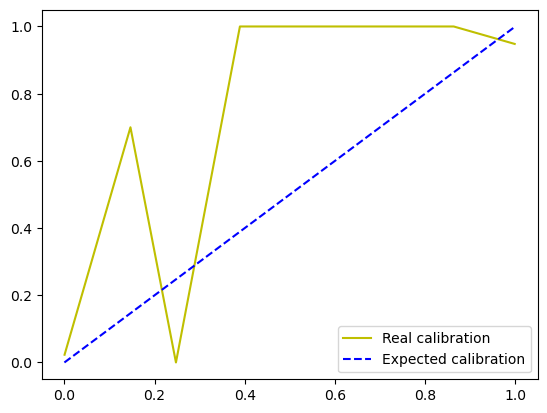

In [17]:
naive_bayes.calibration_curve_from_scratch(y_true=y2, pred_probas=probas, k=10)